<a href="https://colab.research.google.com/github/Tsegai20/ALCF-Homework-AI-driven-Science-on-Super-Computers/blob/main/introllms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Language models (LMs)

Author: Archit Vasan , including materials on LLMs by Varuni Sastri and Carlo Graziani at Argonne, and discussion/editorial work by Taylor Childers, Bethany Lusch, and Venkat Vishwanath (Argonne)

Inspiration from the blog posts "The Illustrated Transformer" and "The Illustrated GPT2" by Jay Alammar, highly recommended reading.

Although the name "language models" is derived from Natural Language Processing, the models used in these approaches can be applied to diverse scientific applications as illustrated below.

## Outline
During this session I will cover:
1. Scientific applications for language models
2. General overview of Transformers
3. Tokenization
4. Model Architecture
5. Pipeline using HuggingFace  
6. Model loading

## Modeling Sequential Data

Sequences are variable-length lists with data in subsequent iterations that depends on previous iterations (or tokens).

Mathematically:
A sequence is a list of tokens: $$T = [t_1, t_2, t_3,...,t_N]$$ where each token within the list depends on the others with a particular probability:

$$P(t_N | t_{N-1}, ..., t_3, t_2, t_1)$$

The purpose of sequential modeling is to learn these probabilities for possible tokens in a distribution to perform various tasks including:
* Sequence generation based on a prompt
* Language translation (e.g. English --> French)
* Property prediction (predicting a property based on an entire sequence)
* Identifying mistakes or missing elements in sequential data

## Scientific sequential data modeling examples

 ### Nucleic acid sequences + genomic data

 <div style="text-align: center">
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/RNA-codons.svg.png?raw=1"
 width="200">
</div>

Nucleic acid sequences can be used to predict translation of proteins, mutations, and gene expression levels.


Here is an image of GenSLM. This is a language model developed by Argonne researchers that can model genomic information in a single model. It was shown to model the evolution of SARS-COV2 without expensive experiments.

<div>

<img src="https://github.com/architvasan/ai_science_local/blob/main/images/genslm.png?raw=1" width="450"/>
</div>

[Zvyagin et. al 2022. BioRXiv](https://www.biorxiv.org/content/10.1101/2022.10.10.511571v1)

### Protein sequences
Protein sequences can be used to predict folding structure, protein-protein interactions, chemical/binding properties, protein function and many more properties.
<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/Protein-Structure-06.png?raw=1" width="400"/>
</div>

<div>
<img src="https://github.com/argonne-lcf/ai-science-training-series/blob/main/04_intro_to_llms/images/ESMFold.png?raw=1" width="700"/>
</div>

[Lin et. al. 2023. Science](https://www.science.org/doi/10.1126/science.ade2574)

### Other applications:

* Biomedical text
* SMILES strings
* Weather predictions
* Interfacing with simulations such as molecular dynamics simulation

## Overview of Language models

We will now briefly talk about the progression of language models.

### Transformers

The most common LMs base their design on the Transformer architecture that was introduced in 2017 in the "Attention is all you need" paper.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/attention_is_all_you_need.png?raw=1" width="500"/>
</div>

[Vaswani 2017. Advances in Neural Information Processing Systems](https://arxiv.org/pdf/1706.03762)

Since then a multitude of LLM architectures have been designed.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/en_chapter1_transformers_chrono.svg?raw=1" width="600"/>
</div>

[HuggingFace NLP Course](https://huggingface.co/learn/nlp-course/chapter1/4)

## Coding example of LLMs in action!

Let's look at an example of running inference with a LLM as a block box to generate text given a prompt and we will also initiate a training loop for an LLM:

Here, we will use the `transformers` library which is as part of HuggingFace, a repository of different models, tokenizers and information on how to apply these models

*Warning: Large Language Models are only as good as their training data. They have no ethics, no judgement, or editing ability. We will be using some pretrained models from Hugging Face which used wide samples of internet hosted text. The datasets have not been strictly filtered to restrict all malign content so the generated text may be surprisingly dark or questionable. They do not reflect our core values and are only used for demonstration purposes.*

In [ ]:
'''
Uncomment below section if running on sophia jupyter notebook
'''
# import os
# os.environ["HTTP_PROXY"]="proxy.alcf.anl.gov:3128"
# os.environ["HTTPS_PROXY"]="proxy.alcf.anl.gov:3128"
# os.environ["http_proxy"]="proxy.alcf.anl.gov:3128"
# os.environ["https_proxy"]="proxy.alcf.anl.gov:3128"
# os.environ["ftp_proxy"]="proxy.alcf.anl.gov:3128"

'\nUncomment below section if running on sophia jupyter notebook\n'

In [1]:
!pip install transformers
!pip install pandas
!pip install torch

In [2]:
from transformers import AutoTokenizer,AutoModelForCausalLM, AutoConfig
input_text = "My dog really wanted to eat icecream because"
from transformers import pipeline
generator = pipeline("text-generation", model="gpt2")
pipe = pipeline("text-generation", model="gpt2")
generator(input_text, max_length=20, num_return_sequences=5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'My dog really wanted to eat icecream because I just wanted something out of it. So she decided'},
 {'generated_text': 'My dog really wanted to eat icecream because its so cute, she would like that too," he'},
 {'generated_text': 'My dog really wanted to eat icecream because I think she liked it.\n\nWhat do you'},
 {'generated_text': 'My dog really wanted to eat icecream because I have so many recipes that are made from scratch,"'},
 {'generated_text': 'My dog really wanted to eat icecream because she was so sensitive, but she was afraid of him'}]

## What's going on under the hood?
There are two components that are "black-boxes" here:

1. The method for tokenization
2. The model that generates novel text.


## Tokenization and embedding of sequential data

Humans can inherently understand language data because they previously learned phonetic sounds.

Machines don’t have phonetic knowledge so they need to be told how to break text into standard units to process it.

They use a system called “tokenization”, where sequences of text are broken into smaller parts, or “tokens”, and then fed as input.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/text-processing---machines-vs-humans.png?raw=1" width="400"/>
</div>

Tokenization is a data preprocessing step which transforms the raw text data into a format suitable for machine learning models. Tokenizers break down raw text into smaller units called tokens. These tokens are what is fed into the language models. Based on the type and configuration of the tokenizer, these tokens can be words, subwords, or characters.

Types of tokenizers:

1. Character Tokenizers: Split text into individual characters.
2. Word Tokenizers: Split text into words based on whitespace or punctuation.
3. Subword Tokenizers: Split text into subword units, such as morphemes or character n-grams. Common subword tokenization algorithms include:
  1. Byte-Pair Encoding (BPE),
  2. SentencePiece,
  3. WordPiece.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/tokenization_image.webp?raw=1" width="400"/>
</div>

[nlpiation](https://nlpiation.medium.com/how-to-use-huggingfaces-transformers-pre-trained-tokenizers-e029e8d6d1fa)

### Example of tokenization
Let's look at an example of tokenization using byte-pair encoding.

In [3]:
from transformers import AutoTokenizer

# A utility function to tokenize a sequence and print out some information about it.

def tokenization_summary(tokenizer, sequence):

    # get the vocabulary
    vocab = tokenizer.vocab
    # Number of entries to print
    n = 10

    # Print subset of the vocabulary
    print("Subset of tokenizer.vocab:")
    for i, (token, index) in enumerate(tokenizer.vocab.items()):
        print(f"{token}: {index}")
        if i >= n - 1:
            break

    print("Vocab size of the tokenizer = ", len(vocab))
    print("------------------------------------------")

    # .tokenize chunks the existing sequence into different tokens based on the rules and vocab of the tokenizer.
    tokens = tokenizer.tokenize(sequence)
    print("Tokens : ", tokens)
    print("------------------------------------------")

    # .convert_tokens_to_ids or .encode or .tokenize converts the tokens to their corresponding numerical representation.
    #  .convert_tokens_to_ids has a 1-1 mapping between tokens and numerical representation
    # ids = tokenizer.convert_tokens_to_ids(tokens)
    # print("encoded Ids: ", ids)

    # .encode also adds additional information like Start of sequence tokens and End of sequene
    print("tokenized sequence : ", tokenizer.encode(sequence))

    # .tokenizer has additional information about attention_mask.
    # encode = tokenizer(sequence)
    # print("Encode sequence : ", encode)
    # print("------------------------------------------")

    # .decode decodes the ids to raw text
    ids = tokenizer.convert_tokens_to_ids(tokens)
    decode = tokenizer.decode(ids)
    print("Decode sequence : ", decode)


tokenizer_1  =  AutoTokenizer.from_pretrained("gpt2") # GPT-2 uses "Byte-Pair Encoding (BPE)"

sequence = "Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat"

tokenization_summary(tokenizer_1, sequence)

Subset of tokenizer.vocab:
ĸļ: 31204
ĠClinical: 21234
mas: 5356
ĠCoul: 27854
Ġconj: 11644
Ġpurse: 27517
'''': 39115
Ġinduce: 21155
2012: 6999
ĠNAME: 36751
Vocab size of the tokenizer =  50257
------------------------------------------
Tokens :  ['Coun', 'sel', 'or', ',', 'Ġplease', 'Ġadjust', 'Ġyour', 'ĠZoom', 'Ġfilter', 'Ġto', 'Ġappear', 'Ġas', 'Ġa', 'Ġhuman', ',', 'Ġrather', 'Ġthan', 'Ġas', 'Ġa', 'Ġcat']
------------------------------------------
tokenized sequence :  [31053, 741, 273, 11, 3387, 4532, 534, 40305, 8106, 284, 1656, 355, 257, 1692, 11, 2138, 621, 355, 257, 3797]
Decode sequence :  Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat


### Token embedding:

Words are turned into vectors based on their location within a vocabulary.

The strategy of choice for learning language structure from tokenized text is to find a clever way to map each token into a moderate-dimension vector space, adjusting the mapping so that

Similar, or associated tokens take up residence nearby each other, and different regions of the space correspond to different position in the sequence.
Such a mapping from token ID to a point in a vector space is called a token embedding. The dimension of the vector space is often high (e.g. 1024-dimensional), but much smaller than the vocabulary size (30,000--500,000).

Various approaches have been attempted for generating such embeddings, including static algorithms that operate on a corpus of tokenized data as preprocessors for NLP tasks. Transformers, however, adjust their embeddings during training.

## Transformer Model Architecture

Now let's look at the base elements that
make up a Transformer by dissecting the popular GPT2 model

In [4]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained('gpt2')
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


GPT2 is an example of a Transformer Decoder which is used to generate novel text.

Decoder models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models. The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

The architecture of GPT-2 is inspired by the paper: "Generating Wikipedia by Summarizing Long Sequences" which is another arrangement of the transformer block that can do language modeling. This model threw away the encoder and thus is known as the “Transformer-Decoder”.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/transformer-decoder-intro.png?raw=1" width="500"/>
</div>

[Illustrated GPT2](https://jalammar.github.io/illustrated-gpt2/)

Key components of the transformer architecture include:

* Input Embeddings: Word embedding or word vectors help us represent words or text as a numeric vector where words with similar meanings have the similar representation.

* Positional Encoding: Injects information about the position of words in a sequence, helping the model understand word order.

* Self-Attention Mechanism: Allows the model to weigh the importance of different words in a sentence, enabling it to effectively capture contextual information.

* Feedforward Neural Networks: Process information from self-attention layers to generate output for each word/token.

* Layer Normalization and Residual Connections: Aid in stabilizing training and mitigating the vanishing gradient problem.

* Transformer Blocks: Comprised of multiple layers of self-attention and feedforward neural networks, stacked together to form the model.

### Attention mechanisms

Since attention mechanisms are arguably the most powerful component of the Transformer, let's discuss this in a little more detail.

Suppose the following sentence is an input sentence we want to translate using an LLM:

`”The animal didn't cross the street because it was too tired”`

To understand a full sentence, the model needs to understand what each word means in relation to other words.

For example, when we read the sentence:
`”The animal didn't cross the street because it was too tired”`
we know intuitively that the word `"it"` refers to `"animal"`, the state for `"it"` is `"tired"`, and the associated action is `"didn't cross"`.

However, the model needs a way to learn all of this information in a simple yet generalizable way.
What makes Transformers particularly powerful compared to earlier sequential architectures is how it encodes context with the **self-attention mechanism**.

As the model processes each word in the input sequence, attention looks at other positions in the input sequence for clues to a better understanding for this word.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/transformer_self-attention_visualization.png?raw=1" width="400"/>
</div>

[The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)

#### Multi-head attention
In practice, multiple attention heads are used simultaneously.

This:
* Expands the model’s ability to focus on different positions.
* Prevents the attention to be dominated by the word itself.

#### Let's see multi-head attention mechanisms in action!

We are going to use the powerful visualization tool bertviz, which allows an interactive experience of the attention mechanisms. Normally these mechanisms are abstracted away but this will allow us to inspect our model in more detail.

In [5]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.7 MB/s eta 0:00:00


Let's load in the model, GPT2 and look at the attention mechanisms.

**Hint... click on the different blocks in the visualization to see the attention**

In [6]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM

from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = 'openai-community/gpt2'
input_text = "No, I am your father"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

## Pipeline using HuggingFace

Now, let's see a practical application of LLMs using a HuggingFace pipeline for classification.

This involves a few steps including:
1. Setting up a prompt
2. Loading in a pretrained model
3. Loading in the tokenizer and tokenizing input text
4. Performing model inference
5. Interpreting inference output

In [7]:
# STEP 0 : Installations and imports
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
import torch
import torch.nn.functional as F

### 1. Setting up a prompt

A "prompt" refers to a specific input or query provided to a language model. They guide the text processing and generation by providing the context for the model to generate coherent and relevant text based on the given input.

The choice and structure of the prompt depends on the specific task, the context and desired output. Prompts can be "discrete" or "instructive" where they are explicit instructions or questions directed to the language model. They can also be more nuanced by more providing suggestions, directions and contexts to the model.

We will use very simple prompts in this tutorial section, but we will learn more about prompt engineering and how it helps in optimizing the performance of the model for a given use case in the following tutorials.

In [8]:
# STEP 1 : Set up the prompt
input_text = "The panoramic view of the ocean was breathtaking."

### 2. Loading Pretrained Models

The AutoModelForSequenceClassification from_pretrained() method instantiates a sequence classification model.

Refer to https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#automodels for the list of model classes supported.

"from_pretrained" method downloads the pre-trained weights from the Hugging Face Model Hub or the specified URL if the model is not already cached locally. It then loads the weights into the instantiated model, initializing the model parameters with the pre-trained values.

The model cache contains:

* model configuration (config.json)
* pretrained model weights (model.safetensors)
* tokenizer information (tokenizer.json, vocab.json, merges.txt, tokenizer.model)

In [9]:
# STEP 2 : Load the pretrained model.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
config = AutoConfig.from_pretrained(model_name)
print(config)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.44.2",
  "vocab_size": 30522
}



### 3. Loading in the tokenizer and tokenizing input text

Here, we load in a pretrained tokenizer associated with this model.

In [10]:
#STEP 3 : Load the tokenizer and tokenize the input text
tokenizer  =  AutoTokenizer.from_pretrained(model_name)
input_ids = tokenizer(input_text, return_tensors="pt")["input_ids"]
print(input_ids)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tensor([[  101,  1996,  6090,  6525,  7712,  3193,  1997,  1996,  4153,  2001,
          3052, 17904,  1012,   102]])


### 4. Performing inference and interpreting

Here, we:
* load data into the model,
* perform inference to obtain logits,
* Convert logits into probabilities
* According to probabilities assign label

The end result is that we can predict whether the input phrase is positive or negative.

In [11]:
# STEP 5 : Perform inference
outputs = model(input_ids)
result = outputs.logits
print(result)

# STEP 6 :  Interpret the output.
probabilities = F.softmax(result, dim=-1)
print(probabilities)
predicted_class = torch.argmax(probabilities, dim=-1).item()
labels = ["NEGATIVE", "POSITIVE"]
out_string = "[{'label': '" + str(labels[predicted_class]) + "', 'score': " + str(probabilities[0][predicted_class].tolist()) + "}]"
print(out_string)

tensor([[-4.2767,  4.5486]], grad_fn=<AddmmBackward0>)
tensor([[1.4695e-04, 9.9985e-01]], grad_fn=<SoftmaxBackward0>)
[{'label': 'POSITIVE', 'score': 0.9998530149459839}]


### Saving and loading models

Model can be saved and loaded to and from a local model directory.

In [12]:
from transformers import AutoModel, AutoModelForCausalLM

# Instantiate and train or fine-tune a model
model = AutoModelForCausalLM.from_pretrained("bert-base-uncased")

# Train or fine-tune the model...

# Save the model to a local directory
directory = "my_local_model"
model.save_pretrained(directory)

# Load a pre-trained model from a local directory
loaded_model = AutoModel.from_pretrained(directory)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Model Hub
The Model Hub is where the members of the Hugging Face community can host all of their model checkpoints for simple storage, discovery, and sharing.

* Download pre-trained models with the huggingface_hub client library, with Transformers for fine-tuning.
* Make use of Inference API to use models in production settings.
* You can filter for different models for different tasks, frameworks used, datasets used, and many more.
* You can select any model, that will show the model card.
* Model card contains information of the model, including the description, usage, limitations etc. Some models also have inference API's that can be used directly.

Model Hub Link : https://huggingface.co/docs/hub/en/models-the-hub

Example of a model card : https://huggingface.co/bert-base-uncased/tree/main

## Recommended reading

* ["The Illustrated Transformer" by Jay Alammar](https://jalammar.github.io/illustrated-transformer/)
* ["Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention)" by Jay Alammar](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
* ["The Illustrated GPT-2 (Visualizing Transformer Language Models)"](https://jalammar.github.io/illustrated-gpt2/)
* ["A gentle introduction to positional encoding"](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)
* ["LLM Tutorial Workshop (Argonne National Laboratory)"](https://github.com/brettin/llm_tutorial)
* ["LLM Tutorial Workshop Part 2 (Argonne National Laboratory)"](https://github.com/argonne-lcf/llm-workshop)

## Homework

1. Load in a generative model using the HuggingFace pipeline and generate text using a batch of prompts.
  * Play with generative parameters such as temperature, max_new_tokens, and the model itself and explain the effect on the legibility of the model response. Try at least 4 different parameter/model combinations.
  * Models that can be used include:
    * `google/gemma-2-2b-it`
    * `microsoft/Phi-3-mini-4k-instruct`
    * `meta-llama/Llama-3.2-1B`
    * Any model from this list: [Text-generation models](https://huggingface.co/models?pipeline_tag=text-generation)
    * `gpt2` if having trouble loading these models in
  * This guide should help! [Text-generation strategies](https://huggingface.co/docs/transformers/en/generation_strategies)
2. Load in 2 models of different parameter size (e.g. GPT2, meta-llama/Llama-2-7b-chat-hf, or distilbert/distilgpt2) and analyze the BertViz for each. How does the attention mechanisms change depending on model size?

# Homework Assignment: Part 1 Language Model Text Generation with Batch Processing

### Objective
Explore the generative capabilities of large language models by generating text from a batch of prompts using the `gpt2` model. We will experiment with the model's response to various prompts, adjusting generation parameters for improved coherence and relevance.


In [13]:
# Step 0: Install Required Libraries
!pip install transformers torch

### Combination 1

In [6]:


# Step 1: Define a Batch of Prompts
prompts = [
    "A perfect morning starts with",
    "My favorite hobby is",
    "If I could travel anywhere, I would go to",
    "The best way to relax is",
    "Happiness means"
]

# Step 2: Load the Pretrained Model and Tokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Verify model configuration to ensure it’s loaded correctly
print(model.config)

# Step 3: Initialize the Text Generation Pipeline
from transformers import pipeline

# Use the pipeline for text generation with the loaded model and tokenizer
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Step 4: Generate Text for Each Prompt in the Batch
for prompt in prompts:
    generated_texts = text_generator(prompt, max_new_tokens=50, temperature=0.7, num_return_sequences=1)
    print(f"Prompt: {prompt}")
    print(f"Generated Text: {generated_texts[0]['generated_text']}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.44.2",
  "use_cache": true,
  "vocab_size": 50257
}



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: A perfect morning starts with
Generated Text: A perfect morning starts with a slow rise in temperature, which then moves to the low (normal), then high (high). The first three minutes are generally quiet. Then the temperature gets higher. This is a good time to start a quick nap.

A perfect morning



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: My favorite hobby is
Generated Text: My favorite hobby is playing with a robot named Maximus. Maximus is a character you can interact with at random with your character, and he is much more fun and engaging than he was before. He will give you a special message whenever you meet him and will ask



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: If I could travel anywhere, I would go to
Generated Text: If I could travel anywhere, I would go to a place that was so beautiful and wonderful."

In the meantime, he added, he would make a series of stops in the South. "We would go to the South. He would have to take a bus, or take a train.



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The best way to relax is
Generated Text: The best way to relax is to get your body going all the way up and down again.

Here's some tips for doing this:

1. Rest. You can rest all day. There are plenty of ways to do this, but the best way to do

Prompt: Happiness means
Generated Text: Happiness means that your personality is less important than your work."

To be fully aware of your own happiness, you need to be a full-time job.

Once you find happiness, the better you are, the better you will be at life



### Combination 2

In [7]:

# Step 1: Define a Batch of Prompts
prompts = [
    "A perfect morning starts with",
    "My favorite hobby is",
    "If I could travel anywhere, I would go to",
    "The best way to relax is",
    "Happiness means"
]

# Step 2: Load the Pretrained Model and Tokenizer
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = "distilgpt2"  # Using a smaller model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Step 3: Initialize the Text Generation Pipeline
from transformers import pipeline

text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Step 4: Generate Text for Each Prompt in the Batch with Adjusted Parameters
for prompt in prompts:
    generated_texts = text_generator(
        prompt,
        max_new_tokens=50,    # Reducing max tokens for better efficiency
        temperature=0.7,       # Adjusted for smoother results with smaller model
        num_return_sequences=1 # Keeping one response per prompt to save resources
    )
    print(f"Prompt: {prompt}")
    for i, generated_text in enumerate(generated_texts):
        print(f"Generated Text {i + 1}: {generated_text['generated_text']}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: A perfect morning starts with
Generated Text 1: A perfect morning starts with a lovely day and a great afternoon.


Fashion and food
If you want to go out and get some delicious food for your family, then you can choose from a variety of ingredients (from fish, nuts, nuts, and nuts



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: My favorite hobby is
Generated Text 1: My favorite hobby is to have something that sticks together with the skin.


As a hobby, I like to have something that sticks together with the skin.
So I'll look at it and then put it in the oven for around 5 minutes.
I



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: If I could travel anywhere, I would go to
Generated Text 1: If I could travel anywhere, I would go to a hotel, a park, a hotel in the middle of an urban city, and be there for the rest of my days. I do not want to do that. I don't want people to feel I have to be there because they see me



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The best way to relax is
Generated Text 1: The best way to relax is to be relaxed and relax at the same time. I think that is a good way to relax, because we can relax and relax at the same time.

The best way to relax is to be relaxed and relax at the same time. The

Prompt: Happiness means
Generated Text 1: Happiness means that you have become a person who is able to be a person who is able to be a person who is able to be a person who is able to be a person who is able to be a person who is able to be a person who is



### Combination 3

In [8]:
# Step 1: Define a Batch of Prompts
prompts = [
    "A perfect morning starts with",
    "My favorite hobby is",
    "If I could travel anywhere, I would go to",
    "The best way to relax is",
    "Happiness means"
]

# Step 2: Load the GPT-2 Model and Tokenizer
from transformers import AutoTokenizer, GPT2LMHeadModel

model_name = "gpt2"  # Smaller, compatible language model for text generation
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Step 3: Initialize the Text Generation Pipeline
from transformers import pipeline

text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Step 4: Generate Text with New Parameter Combinations
for prompt in prompts:
    generated_texts = text_generator(
        prompt,
        max_new_tokens=30,     # Limiting length for efficiency
        temperature=0.7,       # Lower temperature for controlled creativity
        num_return_sequences=2 # Generate two responses per prompt
    )
    print(f"Prompt: {prompt}")
    for i, generated_text in enumerate(generated_texts):
        print(f"Generated Text {i + 1}: {generated_text['generated_text']}\n")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: A perfect morning starts with
Generated Text 1: A perfect morning starts with a quick run of the water, which the runner can use to cool down, then some more. As the waters rise, the runners pull out water

Generated Text 2: A perfect morning starts with an easy cup of coffee. It takes a while for our cup to cool, but once it cools, it is time to head to the office



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: My favorite hobby is
Generated Text 1: My favorite hobby is to collect all sorts of pieces of metal and make them into wooden pieces using the tools we have in our shop. I would suggest using the tools you

Generated Text 2: My favorite hobby is to create an amazing game. It's all about the ideas, the gameplay and the design. That's why I love to create new games. It



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: If I could travel anywhere, I would go to
Generated Text 1: If I could travel anywhere, I would go to a private island for a long time. I didn't have any money to send to the people, and I didn't have the money to pay my

Generated Text 2: If I could travel anywhere, I would go to my aunt's house. I would go to my aunt's house, and I would go to our house in the evening, you know. And then



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The best way to relax is
Generated Text 1: The best way to relax is to find a place where you can relax. It's easier then to think about work-life balance with your kids in your apartment, when you can

Generated Text 2: The best way to relax is to take a nap. This is something that every single good person wants to do.

1. Take a nap while you work. Your body

Prompt: Happiness means
Generated Text 1: Happiness means that you're moving on a path that's already starting to pay off.

The "bad" part of this is that once you become a

Generated Text 2: Happiness means that you are less angry, less worried, and less tired.

It also means that you are more likely to be in good mood, and



### Combination 4

In [9]:
# Step 1: Import necessary libraries
from transformers import pipeline

# Step 2: Define a batch of prompts
prompts = [
    "A perfect morning starts with",
    "My favorite hobby is",
    "If I could travel anywhere, I would go to",
    "The best way to relax is",
    "Happiness means"
]

# Step 3: Load a suitable model for text generation
# Using GPT-2, which is smaller and suitable for generating diverse responses
text_generator = pipeline("text-generation", model="gpt2")

# Step 4: Generate Text with a New Parameter Combination
for prompt in prompts:
    generated_texts = text_generator(
        prompt,
        max_new_tokens=50,      # Allow for more detailed responses
        temperature=0.9,        # Set higher for creativity
        num_return_sequences=3  # Generate multiple responses per prompt
    )
    print(f"Prompt: {prompt}")
    for i, generated_text in enumerate(generated_texts):
        print(f"Generated Text {i + 1}: {generated_text['generated_text']}\n")



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: A perfect morning starts with
Generated Text 1: A perfect morning starts with you coming out to breakfast. Then you've got to decide how you want to watch it. In the morning, I don't like what I'm watching and maybe I have a problem with it. It's usually a good idea to watch TV.

Generated Text 2: A perfect morning starts with breakfast and lunch. It was really great. The meal was great too. There was so much great food. And you'd have to bring everything you'd put on the table for it. The food was delicious but it wasn't really my style.

Generated Text 3: A perfect morning starts with a smile.

"Well, you don't really have to worry about that at this point."

"Thank you?"

But as she opened her mouth to speak, Yuzawa didn't stop her.

…




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: My favorite hobby is
Generated Text 1: My favorite hobby is to create 3D models of the world. This is usually done by combining the 3D modeling into a beautiful and realistic model. You can do it for any hobby where it doesn't bother you much. This is a basic building block to your most

Generated Text 2: My favorite hobby is playing with your friends. It feels like I've gotten more invested in my skills and that's something that I'm really good at, really good at. Once I played with my friends, I discovered I've finally been able to actually just put my

Generated Text 3: My favorite hobby is flying," she said. "It's just as exciting."



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: If I could travel anywhere, I would go to
Generated Text 1: If I could travel anywhere, I would go to the store and pick up my wallet. That's what I'm interested in. I could do it because it's nice and there's no cost. But I'd do it when I had a lot of money," she said.

The question

Generated Text 2: If I could travel anywhere, I would go to school, work, play, and play in my car. There is no need for me to get attached to every single thing and every situation, and it's just like my childhood.

"I could walk around with a baseball bat on my

Generated Text 3: If I could travel anywhere, I would go to China. I could use that or I could go to Russia. But I wouldn't spend time in China, and I wouldn't spend time living in Europe. That's not what I was looking for."

"It's not as if people



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: The best way to relax is
Generated Text 1: The best way to relax is to get off your couch, but it's also a good idea to get someone to stop just to tell you that you were there. Make sure your phone is on (or at least not on your bed; it's in your bed). And if

Generated Text 2: The best way to relax is to go ahead and play!

I didn't know it at the time, but I remember sitting around with my friends and our parents looking over the phone because we didn't know much about the game until after midnight on a Sunday. We were

Generated Text 3: The best way to relax is to eat less and stay at home," said the former president.

But "at this time, I think that it's really difficult and I'm not going to be a person who has to endure this pain," he said. "My work

Prompt: Happiness means
Generated Text 1: Happiness means life.

The more it lives, the greater happiness you will have.

In this life, love is the most powerful emotion in all of living.

The more you love other people, the 

# Part 2 loading two models and visualize their attention mechanisms with bertviz.

In [10]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from bertviz import model_view
import torch


In [11]:
# Define two models of different sizes
small_model_name = "gpt2"         # 124M parameters
large_model_name = "gpt2-medium"  # 345M parameters

# Load the models and tokenizers
small_tokenizer = AutoTokenizer.from_pretrained(small_model_name)
small_model = AutoModelForCausalLM.from_pretrained(small_model_name, output_attentions=True)

large_tokenizer = AutoTokenizer.from_pretrained(large_model_name)
large_model = AutoModelForCausalLM.from_pretrained(large_model_name, output_attentions=True)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [12]:
input_text = "The sun sets over the mountains, casting a golden glow."


In [13]:
# Encode input text for each model
small_inputs = small_tokenizer.encode(input_text, return_tensors='pt')
large_inputs = large_tokenizer.encode(input_text, return_tensors='pt')

# Generate attention weights for each model
small_outputs = small_model(small_inputs)
large_outputs = large_model(large_inputs)

small_attention = small_outputs[-1]  # Last output for attention weights
large_attention = large_outputs[-1]


`GPT2SdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


In [14]:
# Convert token IDs to tokens for each model
small_tokens = small_tokenizer.convert_ids_to_tokens(small_inputs[0])
large_tokens = large_tokenizer.convert_ids_to_tokens(large_inputs[0])

# Display attention views for both models
print("Visualizing attention for small model (GPT-2 124M)")
model_view(small_attention, small_tokens)

print("Visualizing attention for large model (GPT-2 Medium 345M)")
model_view(large_attention, large_tokens)


Visualizing attention for small model (GPT-2 124M)


<IPython.core.display.Javascript object>

Visualizing attention for large model (GPT-2 Medium 345M)


<IPython.core.display.Javascript object>

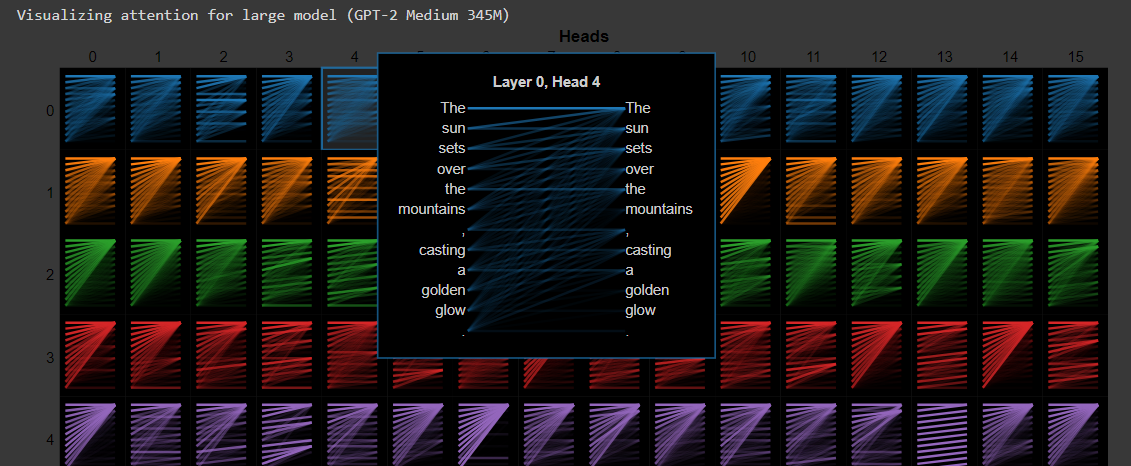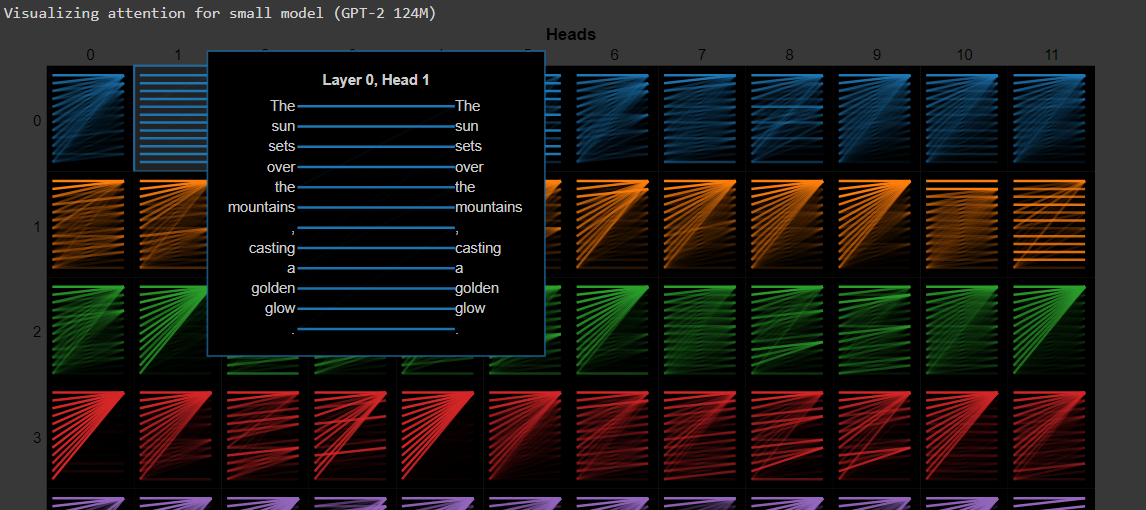

In comparing small and larger models, the larger model (GPT-2 Medium) has more diverse attention heads, allowing it to capture complex relationships and long-range dependencies, whereas the smaller model tends to focus on nearby words. This broader and refined attention in the larger model enhances context understanding, making it better suited for complex tasks